In [1]:
# Importamos las librerías necesarias
import sys
sys.path.append("./utilitys/functions")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re


# 1. Vamos a limpiar los datos

Voy a proceder a limpiar los datos necesarios para este **EDA**. 

Comenzamos por el Dataset de **Ataques de Tiburón**

In [2]:
# Importamos el Dataset de Sharks Attacks

df_sharks = pd.read_csv("./data/global_shark_attack.csv", delimiter = ";")
df_sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,Jack Frost,M,20s,...,N,08h45,Wfite shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,Lyn Jutronich,F,50,...,N,10h00,Juvenile white shark,"R.Collier, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,Kimon Bisogno,F,39.0,...,Y,07h53,"White shark, 13'","Mirror, 9/25/2022",2022.09.25-Plett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.25,2022.09.25,6802.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,male,M,NaN,...,Y,NaN,NaN,F. Abbott & Ouest-France. 5/27/2021,2021.05.25-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.25,2021.05.25,6663.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,Jad French,M,17.0,...,N,19h00,Bronze whaler shark,"K. McMurray, TrackingSharks.com",2021.02.b-French.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.02.02.b,2021.02.02.b,6632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,males x 4,M,NaN,...,y,NaN,NaN,"C.Moore, GSAF",1815.10.00-Tobago.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1815.10.00,1815.10.00,192.0
6886,1804-02-26,1804.0,Watercraft,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,boat,NaN,NaN,...,N,NaN,NaN,"Sydney Gazette, 2/26/1804",1804.02.26-boat-GeorgesHead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1804.02.26.R,1804.02.26.R,182.0
6887,NaN,NaN,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,...,Y,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",ND-0078-canoeist-mail-carrier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0078,ND.0078,70.0
6888,NaN,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",male,M,NaN,...,N,NaN,NaN,"V.M. Coppleson (1962), p.257",ND-0031-Ditched-Aircrat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0031,ND.0031,31.0


In [3]:
# Vamos a hacer una comprobación superficial de los datos de este dataset

print(df_sharks.info())
df_sharks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6587 non-null   object 
 1   Year                    6758 non-null   float64
 2   Type                    6871 non-null   object 
 3   Country                 6839 non-null   object 
 4   Area                    6409 non-null   object 
 5   Location                6325 non-null   object 
 6   Activity                6304 non-null   object 
 7   Name                    6670 non-null   object 
 8   Sex                     6318 non-null   object 
 9   Age                     3903 non-null   object 
 10  Injury                  6853 non-null   object 
 11  Fatal (Y/N)             6890 non-null   object 
 12  Time                    3372 non-null   object 
 13  Species                 3772 non-null   object 
 14  Investigator or Source  6869 non-null   

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,Jack Frost,M,20s,...,N,08h45,Wfite shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,Lyn Jutronich,F,50,...,N,10h00,Juvenile white shark,"R.Collier, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,Kimon Bisogno,F,39.0,...,Y,07h53,"White shark, 13'","Mirror, 9/25/2022",2022.09.25-Plett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.25,2022.09.25,6802.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,male,M,NaN,...,Y,NaN,NaN,F. Abbott & Ouest-France. 5/27/2021,2021.05.25-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.25,2021.05.25,6663.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,Jad French,M,17.0,...,N,19h00,Bronze whaler shark,"K. McMurray, TrackingSharks.com",2021.02.b-French.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.02.02.b,2021.02.02.b,6632.0


# Descripción de los Datos

In [4]:
# Hagamos una tipificación de los datos

card = df_sharks.nunique()

percent_card = (df_sharks.nunique() / len(df_sharks)) * 100

dtypes = df_sharks.dtypes

df_tipificacion = pd.DataFrame({"Card": card,
                                "% Card": percent_card,
                                "Tipo": dtypes
})
df_tipificacion


,Card,% Card,Tipo
Date,5558,80.667634,object
Year,255,3.701016,float64
Type,11,0.159652,object
Country,215,3.120464,object
Area,862,12.510885,object
Location,4427,64.252540,object
Activity,1553,22.539913,object
Name,5638,81.828737,object
Sex,6,0.087083,object
Age,232,3.367199,object


# Limpieza del Data Set de Ataques de Tiburón / Cleanup of our Shark Attacks DataSet

En primer lugar eliminaremos las columnas que no necesitemos y realizaremos una limpieza de valores Nulos, asi como cambios en los types de las columnas. 

///

In fist place we gonna remove all columns we dont need and, after that, a cleanup of NaN and changes in the types. 

In [5]:
#Vamos a eliminar las columnas no utiles para esta investigación

df_sharks.drop(["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order"], axis= 1, inplace= True)
df_sharks.drop(["Name", "Investigator or Source"], axis= 1, inplace= True)
df_sharks

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,08h45,Wfite shark
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,10h00,Juvenile white shark
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,07h53,"White shark, 13'"
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,19h00,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN
6886,1804-02-26,1804.0,Watercraft,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,NaN,NaN,No injury to occupants,N,NaN,NaN
6887,NaN,NaN,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,M,NaN,FATAL,Y,NaN,NaN
6888,NaN,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",M,NaN,Shark bumped him,N,NaN,NaN


In [6]:
year_out_range = df_sharks[df_sharks["Date"]== "1595-01-01"].index

#Eliminamos esa fila / Remove the row

df_sharks.drop(year_out_range, inplace= True)

#Reset index

df_sharks_attack = df_sharks.reset_index()


df_sharks_attack

,index,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,08h45,Wfite shark
1,1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,10h00,Juvenile white shark
2,2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,07h53,"White shark, 13'"
3,3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,19h00,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,6885,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN
6885,6886,1804-02-26,1804.0,Watercraft,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,NaN,NaN,No injury to occupants,N,NaN,NaN
6886,6887,NaN,NaN,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,M,NaN,FATAL,Y,NaN,NaN
6887,6888,NaN,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",M,NaN,Shark bumped him,N,NaN,NaN


In [7]:
#Temove the column

df_sharks_attack.drop("index", inplace= True, axis= 1)
df_sharks_attack

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,08h45,Wfite shark
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,10h00,Juvenile white shark
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,07h53,"White shark, 13'"
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,19h00,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN
6885,1804-02-26,1804.0,Watercraft,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,NaN,NaN,No injury to occupants,N,NaN,NaN
6886,NaN,NaN,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,M,NaN,FATAL,Y,NaN,NaN
6887,NaN,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",M,NaN,Shark bumped him,N,NaN,NaN


In [8]:
#We need a copy / Necesitamos una copia por si acaso

df_global_sharks = df_sharks_attack.copy()

In [9]:
#Reset index, again. / Reseteamos el index de nuevo

df_sharks_attack.reset_index(inplace=True)

df_sharks_attack

,index,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,08h45,Wfite shark
1,1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,10h00,Juvenile white shark
2,2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,07h53,"White shark, 13'"
3,3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,19h00,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,6884,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN
6885,6885,1804-02-26,1804.0,Watercraft,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,NaN,NaN,No injury to occupants,N,NaN,NaN
6886,6886,NaN,NaN,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,M,NaN,FATAL,Y,NaN,NaN
6887,6887,NaN,NaN,Sea Disaster,PAPUA NEW GUINEA,Madang Province,Off Lae,"Aircraft ditched in the sea, swimming ashore",M,NaN,Shark bumped him,N,NaN,NaN


In [10]:
df_sharks_attack.drop("index", axis = 1, inplace= True)

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6586 non-null   object 
 1   Year         6757 non-null   float64
 2   Type         6870 non-null   object 
 3   Country      6838 non-null   object 
 4   Area         6408 non-null   object 
 5   Location     6324 non-null   object 
 6   Activity     6303 non-null   object 
 7   Sex          6317 non-null   object 
 8   Age          3903 non-null   object 
 9   Injury       6852 non-null   object 
 10  Fatal (Y/N)  6889 non-null   object 
 11  Time         3372 non-null   object 
 12  Species      3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.8+ KB


In [11]:
# Define if the date is out of the range
def is_valid_date(date_str):
    try:
        # Try to convert the date in DateTime
        date = pd.to_datetime(date_str, errors='raise')
        # Verify if the Date is in range
        if pd.Timestamp.min <= date <= pd.Timestamp.max:
            return True
        else:
            return False
    except:
        return False

In [12]:
#Aplicamos nuestra función
df_sharks_attack = df_sharks_attack[df_sharks_attack["Date"].apply(is_valid_date)]

In [13]:


df_sharks_attack["Date"] = pd.to_datetime(df_sharks_attack["Date"], errors= "coerce")

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6577 entries, 0 to 6885
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6575 non-null   float64       
 2   Type         6561 non-null   object        
 3   Country      6535 non-null   object        
 4   Area         6150 non-null   object        
 5   Location     6076 non-null   object        
 6   Activity     6048 non-null   object        
 7   Sex          6039 non-null   object        
 8   Age          3853 non-null   object        
 9   Injury       6549 non-null   object        
 10  Fatal (Y/N)  6577 non-null   object        
 11  Time         3336 non-null   object        
 12  Species      3655 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 719.4+ KB


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2814660417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Date"] = pd.to_datetime(df_sharks_attack["Date"], errors= "coerce")


In [14]:
#The column Time is filled  of NaN and is useless

df_sharks_attack.drop("Time", axis = 1, inplace= True)

df_sharks_attack

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\519916252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack.drop("Time", axis = 1, inplace= True)


,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,Wfite shark
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,Juvenile white shark
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,"White shark, 13'"
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...
6881,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,NaN,FATAL,Y,NaN
6882,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,7 or 8,FATAL,Y,NaN
6883,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,NaN,Leg severed,N,NaN
6884,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN


In [15]:
df_sharks_attack.reset_index(inplace=True)
df_sharks_attack.drop("index", inplace=True, axis=1)
df_sharks_attack

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1573295083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack.drop("index", inplace=True, axis=1)


,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,Wfite shark
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,Juvenile white shark
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,"White shark, 13'"
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,NaN,FATAL,Y,NaN
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,7 or 8,FATAL,Y,NaN
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,NaN,Leg severed,N,NaN
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN


In [16]:

df_sharks_attack

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,Wfite shark
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,Juvenile white shark
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,"White shark, 13'"
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,Bronze whaler shark
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,NaN,FATAL,Y,NaN
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,7 or 8,FATAL,Y,NaN
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,NaN,Leg severed,N,NaN
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN


In [17]:
def extract_first_number(s):
    if pd.isna(s):
        return s
    
    #Find all numbers in the chain
    numbers = re.findall(r'\d+', s)
    
    #Return the first number if exist
    return numbers[0] if numbers else None

df_sharks_attack["Age_clean"] = df_sharks_attack["Age"].apply(extract_first_number)

df_sharks_attack

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1914893643.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Age_clean"] = df_sharks_attack["Age"].apply(extract_first_number)


,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,Wfite shark,20
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,Juvenile white shark,50
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,"White shark, 13'",39
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,Bronze whaler shark,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,NaN,FATAL,Y,NaN,NaN
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,7 or 8,FATAL,Y,NaN,7
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,NaN,Leg severed,N,NaN,NaN
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN


In [18]:
#Convertimos la columna en numerica / COnvert the column in numeric

df_sharks_attack["Age_clean"] = pd.to_numeric(df_sharks_attack["Age_clean"], errors="coerce")

df_sharks_attack

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1479875131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Age_clean"] = pd.to_numeric(df_sharks_attack["Age_clean"], errors="coerce")


,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,20s,Laceration to leg,N,Wfite shark,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,50,Shallow punctures & lacerations to right thigh,N,Juvenile white shark,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,39.0,FATAL,Y,"White shark, 13'",39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,NaN,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,17.0,"No injury, surf ski bitten",N,Bronze whaler shark,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,NaN,FATAL,Y,NaN,NaN
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,7 or 8,FATAL,Y,NaN,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,NaN,Leg severed,N,NaN,NaN
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN


In [19]:
df_sharks_attack.drop("Age", axis= 1, inplace= True)
df_sharks_attack


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2526224968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack.drop("Age", axis= 1, inplace= True)


,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,Wfite shark,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,Juvenile white shark,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,"White shark, 13'",39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,NaN,NaN
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,Bronze whaler shark,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,FATAL,Y,NaN,NaN
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,NaN,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,Leg severed,N,NaN,NaN
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,FATAL,y,NaN,NaN


In [20]:
# Fill the NaN in Age with the mean

media_edad = round(df_sharks_attack["Age_clean"].mean(), ndigits= 0)

print(f"The mean of victims in Sharks Attacks was {media_edad} years old")

df_sharks_attack["Age_clean"].fillna(media_edad, inplace= True)

df_sharks_attack

The mean of victims in Sharks Attacks was 28.0 years old


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2838194152.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sharks_attack["Age_clean"].fillna(media_edad, inplace= True)
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2838194152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Age_clean"].fillna(media_edad, inplace=

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,Wfite shark,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,Juvenile white shark,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,"White shark, 13'",39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,NaN,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,Bronze whaler shark,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,NaN,Fell overboard,M,FATAL,Y,NaN,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,NaN,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,M,Leg severed,N,NaN,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,FATAL,y,NaN,28.0


In [21]:
# Now we have the Age clean and free of NaN's, its time to clean the rest

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6575 non-null   float64       
 2   Type         6561 non-null   object        
 3   Country      6535 non-null   object        
 4   Area         6150 non-null   object        
 5   Location     6076 non-null   object        
 6   Activity     6048 non-null   object        
 7   Sex          6039 non-null   object        
 8   Injury       6549 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      3655 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


In [22]:
year_nan = df_sharks_attack[df_sharks_attack["Year"].isna()]
year_nan
        

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
4252,2017-01-08,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,M,"No attack, shark made a threat display",UNKNOWN,Bull shark,35.0
4906,1836-08-19,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,M,FATAL,Y,NaN,28.0


In [23]:
#Remove NaN of Year column

df_sharks_attack.loc[4252, "Year"] = 2017
df_sharks_attack.loc[4906, "Year"] = 1836

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6577 non-null   float64       
 2   Type         6561 non-null   object        
 3   Country      6535 non-null   object        
 4   Area         6150 non-null   object        
 5   Location     6076 non-null   object        
 6   Activity     6048 non-null   object        
 7   Sex          6039 non-null   object        
 8   Injury       6549 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      3655 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


In [24]:
#Remove NaN from Type, Country, Area and Location column.

df_sharks_attack["Type"].fillna("Unknow", inplace=True)
df_sharks_attack["Country"].fillna("Unknow", inplace=True)
df_sharks_attack["Area"].fillna("Unknow", inplace=True)
df_sharks_attack["Location"].fillna("Unknow", inplace=True)
df_sharks_attack["Injury"].fillna("Unknow", inplace=True)
df_sharks_attack["Species "].fillna("Unknow", inplace=True)

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6577 non-null   float64       
 2   Type         6577 non-null   object        
 3   Country      6577 non-null   object        
 4   Area         6577 non-null   object        
 5   Location     6577 non-null   object        
 6   Activity     6048 non-null   object        
 7   Sex          6039 non-null   object        
 8   Injury       6577 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      6577 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\3498578579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sharks_attack["Type"].fillna("Unknow", inplace=True)
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\3498578579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Type"].fillna("Unknow", inplace=True)
C:\Users\

In [25]:
#We can see a patron.

mode_activity = df_sharks_attack["Activity"].mode()[0]

mode_activity

#Surfing is the most dangerous activity

'Surfing'

In [26]:
#We gonna fill the NaN with that. 

df_sharks_attack["Activity"].fillna(mode_activity, inplace=True)

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1181683291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sharks_attack["Activity"].fillna(mode_activity, inplace=True)
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1181683291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Activity"].fillna(mode_activity, inpla

In [27]:
df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6577 non-null   float64       
 2   Type         6577 non-null   object        
 3   Country      6577 non-null   object        
 4   Area         6577 non-null   object        
 5   Location     6577 non-null   object        
 6   Activity     6577 non-null   object        
 7   Sex          6039 non-null   object        
 8   Injury       6577 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      6577 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


In [28]:
mode_sex = df_sharks_attack["Sex "].mode()[0]

mode_sex

'M'

In [29]:
df_sharks_attack["Sex "].fillna(mode_sex, inplace=True)

df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6577 non-null   float64       
 2   Type         6577 non-null   object        
 3   Country      6577 non-null   object        
 4   Area         6577 non-null   object        
 5   Location     6577 non-null   object        
 6   Activity     6577 non-null   object        
 7   Sex          6577 non-null   object        
 8   Injury       6577 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      6577 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\240997453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sharks_attack["Sex "].fillna(mode_sex, inplace=True)
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\240997453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Sex "].fillna(mode_sex, inplace=True)


In [30]:
#Species time

df_sharks_attack.loc[0, "Species "] = "White Shark"
df_sharks_attack["Species "] = df_sharks_attack["Species "].str.upper()

df_sharks_attack

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2152143454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Species "] = df_sharks_attack["Species "].str.upper()


,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,JUVENILE WHITE SHARK,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,"WHITE SHARK, 13'",39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,Unknow,Fell overboard,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,Surfing,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,Unknow,Scarborough Bay,Bathing,M,FATAL,y,UNKNOW,28.0


In [31]:
df_sharks_attack["Fatal (Y/N)"] = df_sharks_attack["Fatal (Y/N)"].str.upper()
df_sharks_attack["Fatal (Y/N)"]

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\989757432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Fatal (Y/N)"] = df_sharks_attack["Fatal (Y/N)"].str.upper()


0       N
1       N
2       Y
3       Y
4       N
       ..
6572    Y
6573    Y
6574    N
6575    Y
6576    N
Name: Fatal (Y/N), Length: 6577, dtype: object

In [32]:
#Okay. Time to ajust this column

#First, filter the values
mask = df_sharks_attack["Species "].str.contains("BULL SHARK", case=False, na= False)

#See the rows...

print("The rows whit Bull Sharks: ")
print(df_sharks_attack[mask])

#Replace the values for Bull Shark

df_sharks_attack.loc[mask, "Species "] = "BULL SHARK"

df_sharks_attack


The rows whit Bull Sharks: 
           Date    Year        Type    Country              Area  \
19   2017-06-18  2017.0  Unprovoked        USA    South Carolina   
32   2016-01-24  2016.0  Unprovoked        USA             Texas   
33   2015-12-11  2015.0  Unprovoked    BAHAMAS            Unknow   
35   2015-06-14  2015.0  Unprovoked        USA    North Carolina   
36   2015-01-30  2015.0  Watercraft  AUSTRALIA        Queensland   
...         ...     ...         ...        ...               ...   
6374 2015-06-01  2015.0  Unprovoked    REUNION           Le Port   
6378 2014-10-14  2014.0  Unprovoked        USA    South Carolina   
6403 2009-12-20  2009.0  Unprovoked  AUSTRALIA        Queensland   
6414 2008-02-24  2008.0  Unprovoked    BAHAMAS  Northern Bahamas   
6424 2005-02-26  2005.0  Unprovoked  AUSTRALIA        Queensland   

                                        Location                Activity Sex   \
19    Burkes Beach, Hilton Head, Beaufort County                Swimming  

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,JUVENILE WHITE SHARK,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,"WHITE SHARK, 13'",39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,Unknow,Fell overboard,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,Surfing,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,Unknow,Scarborough Bay,Bathing,M,FATAL,Y,UNKNOW,28.0


In [33]:
#First, filter the values
mask = df_sharks_attack["Species "].str.contains("WHITE SHARK", case=False, na= False)

#See the rows...

print("The rows whit White Shark: ")
print(df_sharks_attack[mask])

#Replace the values for Bull Shark

df_sharks_attack.loc[mask, "Species "] = "WHITE SHARK"

df_sharks_attack

The rows whit White Shark: 
           Date    Year        Type       Country                   Area  \
0    2023-07-24  2023.0  Unprovoked     Australia      Western Australia   
1    2022-11-04  2022.0  Unprovoked           USA             California   
2    2022-09-25  2022.0  Unprovoked  SOUTH AFRICA  Western Cape Province   
7    2019-12-20  2019.0    Provoked     AUSTRALIA        New South Wales   
10   2019-05-07  2019.0  Unprovoked           USA             California   
...         ...     ...         ...           ...                    ...   
6487 1971-06-30  1971.0  Unprovoked  SOUTH AFRICA  Western Cape Province   
6502 1960-11-01  1960.0  Watercraft  SOUTH AFRICA  Western Cape Province   
6524 1951-11-28  1951.0  Unprovoked  SOUTH AFRICA          KwaZulu-Natal   
6525 1950-07-27  1950.0  Watercraft     AUSTRALIA        South Australia   
6543 1926-07-08  1926.0  Unprovoked           USA             California   

                                               Location  \


,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,WHITE SHARK,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,WHITE SHARK,39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,Unknow,Fell overboard,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,Surfing,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,Unknow,Scarborough Bay,Bathing,M,FATAL,Y,UNKNOW,28.0


In [34]:
#First, filter the values
mask = df_sharks_attack["Species "].str.contains("TIGER SHARK", case=False, na= False)

#See the rows...

print("The rows whit Tiger Shark: ")
print(df_sharks_attack[mask])

#Replace the values for Tiger Shark

df_sharks_attack.loc[mask, "Species "] = "TIGER SHARK"

df_sharks_attack

The rows whit Tiger Shark: 
           Date    Year        Type         Country               Area  \
11   2019-04-05  2019.0    Provoked           CHINA  Liaoning Province   
13   2018-11-14  2018.0  Watercraft       AUSTRALIA         Queensland   
31   2016-04-09  2016.0  Unprovoked   NEW CALEDONIA        Grand Terre   
78   2003-11-27  2003.0  Unprovoked    SOUTH AFRICA      KwaZulu-Natal   
90   2000-07-06  2000.0  Unprovoked             USA     North Carolina   
...         ...     ...         ...             ...                ...   
6434 2000-03-15  2000.0  Unprovoked   NEW CALEDONIA     North Province   
6449 1993-12-01  1993.0  Unprovoked             USA             Hawaii   
6450 1993-10-01  1993.0  Unprovoked             USA             Hawaii   
6460 1990-10-15  1990.0  Unprovoked             USA             Hawaii   
6509 1958-12-12  1958.0  Unprovoked  AMERICAN SAMOA     Tutuila Island   

                                       Location               Activity Sex   \
11  

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,WHITE SHARK,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,WHITE SHARK,39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,Unknow,Fell overboard,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,Surfing,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,Unknow,Scarborough Bay,Bathing,M,FATAL,Y,UNKNOW,28.0


In [35]:
#First, filter the values
mask = df_sharks_attack["Species "].str.contains("HAMMERHEAD SHARK", case=False, na= False)

#See the rows...

print("The rows whit Hammer Head Shark: ")
print(df_sharks_attack[mask])

#Replace the values for Hammerhead Shark

df_sharks_attack.loc[mask, "Species "] = "HAMMERHEAD SHARK"

df_sharks_attack

The rows whit Hammer Head Shark: 
           Date    Year          Type           Country  \
120  1983-07-12  1983.0    Unprovoked               USA   
499  2015-09-05  2015.0      Provoked               USA   
867  1959-08-13  1959.0      Provoked               USA   
1044 1992-11-12  1992.0    Unprovoked              FIJI   
1318 1958-08-31  1958.0          Boat            MEXICO   
1431 2015-09-19  2015.0    Watercraft               USA   
1566 1961-05-15  1961.0    Unprovoked               USA   
1757 1981-02-16  1981.0    Unprovoked         AUSTRALIA   
1965 1989-01-20  1989.0    Unprovoked               USA   
2010 1959-09-26  1959.0  Sea Disaster               USA   
2186 1984-06-03  1984.0    Unprovoked               USA   
2264 1913-09-21  1913.0    Unprovoked               USA   
2340 2015-08-10  2015.0      Provoked               USA   
2449 1964-08-08  1964.0    Unprovoked               USA   
2637 2010-01-31  2010.0    Unprovoked            BRAZIL   
2679 2000-01-01  2000.

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,Unprovoked,USA,California,"Del Mar Beach, San Diego County",Swimming,F,Shallow punctures & lacerations to right thigh,N,WHITE SHARK,50.0
2,2022-09-25,2022.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,F,FATAL,Y,WHITE SHARK,39.0
3,2021-05-25,2021.0,Provoked,NEW CALEDONIA,Nouville,CHS Beach,Spearfishing,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,Watercraft,AUSTRALIA,South Australia,Gleneg,Surf skiing,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,Unprovoked,Coast of AFRICA,Island of St. Thomas,Unknow,Fell overboard,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,Surfing,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,Unprovoked,TOBAGO,Unknow,Scarborough Bay,Bathing,M,FATAL,Y,UNKNOW,28.0


In [36]:
#Todas las columnas a Upper

df_sharks_attack["Type"] = df_sharks_attack["Type"].str.upper()
df_sharks_attack["Country"] = df_sharks_attack["Country"].str.upper()
df_sharks_attack["Area"] = df_sharks_attack["Area"].str.upper()
df_sharks_attack["Location"] = df_sharks_attack["Location"].str.upper()
df_sharks_attack["Activity"] = df_sharks_attack["Activity"].str.upper()
df_sharks_attack["Sex "] = df_sharks_attack["Sex "].str.upper()

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\951778467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Type"] = df_sharks_attack["Type"].str.upper()
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\951778467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Country"] = df_sharks_attack["Country"].str.upper()
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\951778467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [37]:
#Algunos valores no me sirven en la columna Sex. Vamos a remplazarlos.

unwanted_values = ["N", "LLI", ".", "M X 2"]

df_sharks_attack["Sex "] = df_sharks_attack["Sex "].replace(unwanted_values, "Unknown")

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\504086209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Sex "] = df_sharks_attack["Sex "].replace(unwanted_values, "Unknown")


In [38]:
#Algunos valores no me sirven en la columna Fatal. Vamos a remplazarlos.
unwanted_values = ["F", "Y X 2", "NQ", "2017.0"]

df_sharks_attack["Fatal (Y/N)"] = df_sharks_attack["Fatal (Y/N)"].replace(unwanted_values, "UNKNOWN")

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\884011687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks_attack["Fatal (Y/N)"] = df_sharks_attack["Fatal (Y/N)"].replace(unwanted_values, "UNKNOWN")


In [39]:
df_sharks_attack

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Species,Age_clean
0,2023-07-24,2023.0,UNPROVOKED,AUSTRALIA,WESTERN AUSTRALIA,GNARABUP BEACH,SURFING,M,Laceration to leg,N,WHITE SHARK,20.0
1,2022-11-04,2022.0,UNPROVOKED,USA,CALIFORNIA,"DEL MAR BEACH, SAN DIEGO COUNTY",SWIMMING,F,Shallow punctures & lacerations to right thigh,N,WHITE SHARK,50.0
2,2022-09-25,2022.0,UNPROVOKED,SOUTH AFRICA,WESTERN CAPE PROVINCE,"CENTRAL BEACH, PLETTENBERG BAY",SWIMMING,F,FATAL,Y,WHITE SHARK,39.0
3,2021-05-25,2021.0,PROVOKED,NEW CALEDONIA,NOUVILLE,CHS BEACH,SPEARFISHING,M,Presumed fatal PROVOKED INCIDENT,Y,UNKNOW,28.0
4,2021-02-02,2021.0,WATERCRAFT,AUSTRALIA,SOUTH AUSTRALIA,GLENEG,SURF SKIING,M,"No injury, surf ski bitten",N,BRONZE WHALER SHARK,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1844-05-24,1844.0,UNPROVOKED,COAST OF AFRICA,ISLAND OF ST. THOMAS,UNKNOW,FELL OVERBOARD,M,FATAL,Y,UNKNOW,28.0
6573,1842-01-01,1842.0,UNPROVOKED,INDIA,TAMIL NADU,CHENNAI (FORMERLY MADRAS),WASHED OFF CATAMARAN IN THE SURF,M,FATAL,Y,UNKNOW,7.0
6574,1826-12-01,1826.0,UNPROVOKED,BRAZIL,PARAIBA,PARAIBA,SURFING,M,Leg severed,N,UNKNOW,28.0
6575,1815-10-01,1815.0,UNPROVOKED,TOBAGO,UNKNOW,SCARBOROUGH BAY,BATHING,M,FATAL,Y,UNKNOW,28.0


# El Data Frame ya esta limpio. 

### Ahora vamos a ordenarlo y prepararlo para el analisis.

In [40]:
#Ordenamos en Data Frame // Reorder the Data Frame
'''
df_sharks_attack.sort_values(by= "Date",ascending= False, inplace= True)
df_sharks_attack.reset_index(inplace=True)
df_sharks_attack.drop("index", inplace=True, axis= 1)
df_sharks_attack.drop("level_0", inplace=True, axis= 1)
'''
df_sharks_attack.columns = df_sharks_attack.columns.str.strip()
df_sharks_attack.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex', 'Injury', 'Fatal (Y/N)', 'Species', 'Age_clean'],
      dtype='object')

In [41]:
df_sharks_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6577 non-null   datetime64[ns]
 1   Year         6577 non-null   float64       
 2   Type         6577 non-null   object        
 3   Country      6577 non-null   object        
 4   Area         6577 non-null   object        
 5   Location     6577 non-null   object        
 6   Activity     6577 non-null   object        
 7   Sex          6577 non-null   object        
 8   Injury       6577 non-null   object        
 9   Fatal (Y/N)  6577 non-null   object        
 10  Species      6577 non-null   object        
 11  Age_clean    6577 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 616.7+ KB


# Analisis 

## Ahora que tenemos el Data Set limpio vamos a realizar un analisis del mismo. 

1. Primero que todo aquí va mi hipótesis:
    ¿Durante los ultimos años, se han dado más ataques de tiburón que en el pasado debido a la actividad humana?

Year
2015.0    143
2017.0    140
2016.0    131
2014.0    126
2011.0    126
         ... 
1841.0      1
1779.0      1
1748.0      1
1810.0      1
1804.0      1
Name: count, Length: 239, dtype: int64


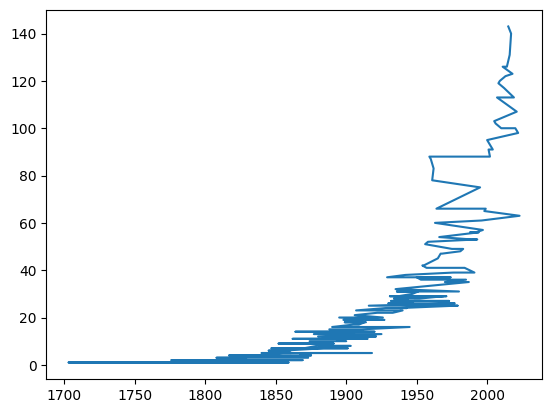

In [42]:
#Veamos cuantos ataques hay por año. 

attack_for_year = df_sharks_attack["Year"].value_counts()

print(attack_for_year)

#Queda claro que con los años, los ataques de tiburon han aunmentado, con un ligero descenso a partir del 2015. Nos hace suponer que es por temas de conservación y cuidado de los tiburones por parte de las asociaciones.

fig = plt.figure()
ax = plt.axes()

plt.plot(attack_for_year)
plt.savefig("./img/attacks_per_year.png");




C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1217915977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015["Month"] = df_2015["Date"].dt.month
C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1217915977.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "Month", data=df_2015, palette="viridis")


Month
1     12
2      5
3      9
4      7
5     10
6     22
7     18
8      9
9     17
10    16
11     9
12     9
Name: count, dtype: int64
El mes con más ataques de tiburón en 2015 es: 6


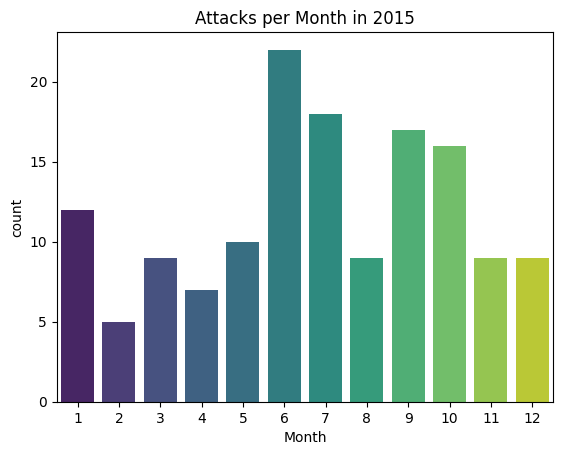

In [43]:
#Filtramos el Año

df_2015 = df_sharks_attack[df_sharks_attack["Date"].dt.year == 2015]

#Ahora los meses
df_2015["Month"] = df_2015["Date"].dt.month

#Contabilizamos
attacks_per_month = df_2015["Month"].value_counts().sort_index()

print(attacks_per_month)

most_attacks_month = attacks_per_month.idxmax()

print(f"El mes con más ataques de tiburón en 2015 es: {most_attacks_month}")

#En Junio se producen la mayoría de ataques de tiburón, debido a la temporada de verano seguramente... Pero Octubre y Noviembre tambien... 
fig, axs = plt.subplots(nrows=1, ncols=1)
sns.countplot(x= "Month", data=df_2015, palette="viridis")
axs.set_title("Attacks per Month in 2015")
plt.savefig("./img/attacks_per_month_in_2015.png");



C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2710733697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015["Month"] = df_2015["Date"].dt.month


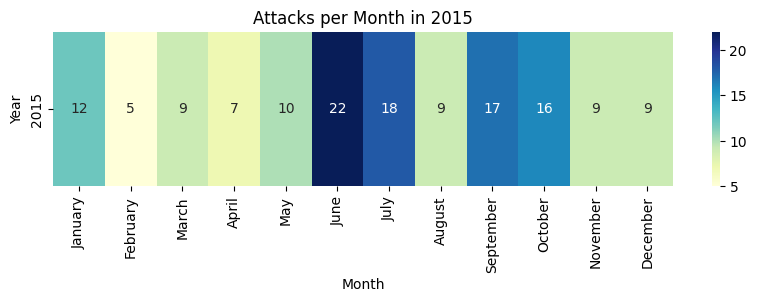

In [44]:
#Veamos el mapa de calor

df_2015 = df_sharks_attack[df_sharks_attack["Date"].dt.year == 2015]

#Ahora los meses
df_2015["Month"] = df_2015["Date"].dt.month

#Contabilizamos
attacks_per_month = df_2015["Month"].value_counts().sort_index()


month_order = [1,2,3,4,5,6,7,8,9,10,11,12]
month_names = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
attacks_per_month.index = [month_names[i-1] for i in attacks_per_month.index]
attacks_per_month = attacks_per_month.reindex(month_names, fill_value=0)

heatmap_data = pd.DataFrame(attacks_per_month).T


plt.figure(figsize=(10,2))
sns.heatmap(heatmap_data, annot= True, cmap="YlGnBu", fmt= "g", cbar= True,
            xticklabels=heatmap_data.columns, yticklabels=["2015"])

plt.title("Attacks per Month in 2015")
plt.xlabel("Month")
plt.ylabel("Year")
plt.savefig("./img/attacks_per_month_heatmap.png", dpi = 300)

plt.show()

Type
UNPROVOKED             4826
PROVOKED                611
INVALID                 533
WATERCRAFT              336
SEA DISASTER            228
QUESTIONABLE             17
UNKNOW                   16
BOAT                      6
?                         1
UNDER INVESTIGATION       1
UNVERIFIED                1
UNCONFIRMED               1
Name: count, dtype: int64 

Type
UNPROVOKED             73.4
PROVOKED                9.3
INVALID                 8.1
WATERCRAFT              5.1
SEA DISASTER            3.5
QUESTIONABLE            0.3
UNKNOW                  0.2
BOAT                    0.1
?                       0.0
UNDER INVESTIGATION     0.0
UNVERIFIED              0.0
UNCONFIRMED             0.0
Name: count, dtype: float64 

El porcentaje de ataques no provocados es de: 73.4%  

La mayoría de ataques de tiburón han sido: UNPROVOKED


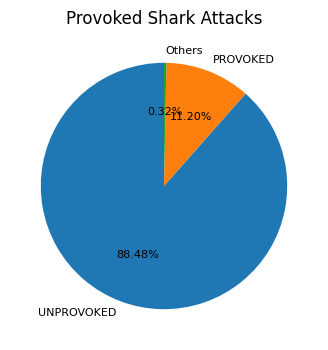

In [45]:
# Si es así, ¿Podemos dar por hecho que la mayoría de ataques han sido no provocados?

unprovoked_or_not = df_sharks_attack["Type"].value_counts()
print(unprovoked_or_not, "\n")

#En frecuencia relativa...
unprovoked_or_not_rl = round(df_sharks_attack["Type"].value_counts()/ len(df_sharks_attack)*100, ndigits=1)
print(unprovoked_or_not_rl, "\n")
print(f"El porcentaje de ataques no provocados es de: {unprovoked_or_not_rl.max()}%  \n")


mode_type = df_sharks_attack["Type"].mode()[0]
print(f"La mayoría de ataques de tiburón han sido: {mode_type}")

#Claramente es cierta. Debido a la actividad humana sabemos que la mayoría de ataques ocurren de manera no provocada. Por tanto...

umbral = 9

small_segments = unprovoked_or_not_rl[unprovoked_or_not_rl < umbral]

unprovoked_or_not.loc["Others"] = small_segments.sum()

unprovoked_or_not = unprovoked_or_not.drop(small_segments.index)

fig, axs = plt.subplots(ncols=1, nrows=1, figsize = (4,4))
axs.pie(unprovoked_or_not, 
        labels= unprovoked_or_not.index,
        autopct= '%.2f%%', startangle = 90,
        textprops = {'fontsize': 8})
axs.set_title("Provoked Shark Attacks")

plt.savefig("./img/provoked_percent.png", dpi = 300);


In [46]:
# ¿Qué actividad es la que más llama la atención de los tiburones para que se produzca un ataque? 

activity_most_dangerous = df_sharks_attack["Activity"].value_counts()
print(activity_most_dangerous, "\n")

#¿Cual es la actividad que más se repite?
mode_activity = df_sharks_attack["Activity"].mode()[0]

print(f"La actividad más peligrosa y que más llama la atención de los tiburones es:  {mode_activity}")



Activity
SURFING                                                                      1634
SWIMMING                                                                      974
FISHING                                                                       481
SPEARFISHING                                                                  368
WADING                                                                        166
                                                                             ... 
JUMPED OVERBOARD AFTER MURDERING 2 SHIPMATES                                    1
SEA DISASTER : WRECK OF THE TAIAROA                                             1
CROSSING THE RIVER MOUTH                                                        1
A CANOE WAS PURSUING A SCHOONER THAT HAD FORCIBILY ABDUCTED 5 YOUNG GIRLS       1
WASHED OFF CATAMARAN IN THE SURF                                                1
Name: count, Length: 1433, dtype: int64 

La actividad más peligrosa y que más llama la a

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1529424781.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Activity", y = "Attacks", data= df_sumario, palette= 'viridis')


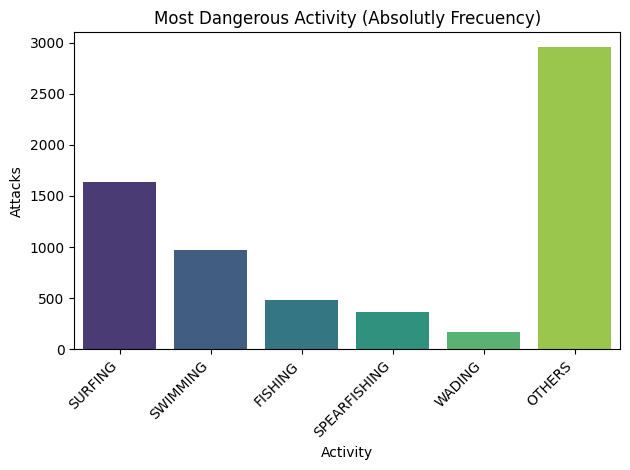

In [47]:
#Vamos a presentarlo en una gráfica para verlo más claramente

umbral = 160

small_segments = activity_most_dangerous[activity_most_dangerous < umbral] #Identificamos los valores debajo del umbral

activity_most_dangerous["OTHERS"] = small_segments.sum()

activity_most_dangerous = activity_most_dangerous.drop(small_segments.index) #Agrupamos los valores pequeños

#Vamos a convertirlo en un DataFrame para poder manejarlo mejor con Seaborn

df_sumario = activity_most_dangerous.reset_index()
df_sumario.columns = ["Activity", "Attacks"]

#Quitamos Others para que no estorbe.
df_sumario = df_sumario[df_sumario["Activity"] != "Others"]


fig, axs = plt.subplots(1,1)

sns.barplot(x= "Activity", y = "Attacks", data= df_sumario, palette= 'viridis')
axs.set_title("Most Dangerous Activity (Absolutly Frecuency)")
axs.set_ylabel("Attacks")
axs.set_xlabel("Activity")
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout()
plt.savefig("./img/most_dangerous_activity.png", dpi = 300);

In [48]:
#¿Qué porcentaje de genero sufre más ataques? ¿Y qué actividades se asocian más a ellos?

attacks_by_gender = df_sharks_attack["Sex"].value_counts()
sex_percent = round(df_sharks_attack["Sex"].value_counts() / len(df_sharks_attack) * 100, ndigits= 1)

print(attacks_by_gender, "\n")
print(sex_percent, "\n")

#En casi un 88.6% los ataques se han producido a hombres. 

activity_for_gender = df_sharks_attack.groupby(["Activity", "Sex"]).size().unstack(fill_value=0)
print("\nNúmero de ataques por actividad y genero:")
print(activity_for_gender, "\n")

most_common_activity_for_gender = activity_for_gender.idxmax(axis=0)
print("\n", most_common_activity_for_gender)

#Queda claro que la actividad en Hombres es Surfing mientras que en Mujeres es Swimming



Sex
M          5830
F           742
Unknown       5
Name: count, dtype: int64 

Sex
M          88.6
F          11.3
Unknown     0.1
Name: count, dtype: float64 


Número de ataques por actividad y genero:
Sex                                                 F  M  Unknown
Activity                                                         
.                                                   0  2        1
12 OF THE PENANG'S CREW WERE RETURNING TO THE S...  0  1        0
14 M PRAWN TRAWLER NEW VENTURE CAPSIZED  & SANK...  0  1        0
1446-TON NORWEGIAN BARQUE ERROL, BOUND FROM PER...  0  1        0
16' CATAMARAN CAPSIZED PREVIOUS NIGHT, OCCUPANT...  1  0        0
...                                                .. ..      ...
YACHT OF MICHAEL HOWELL CAPSIZED                    0  1        0
YACHT RACE                                          0  1        0
YACHT TRASHMAN CAPSIZED IN STORM                    0  0        1
YACHTING ACCIDENT                                   0  1        0
ZOS

<Figure size 1000x600 with 0 Axes>

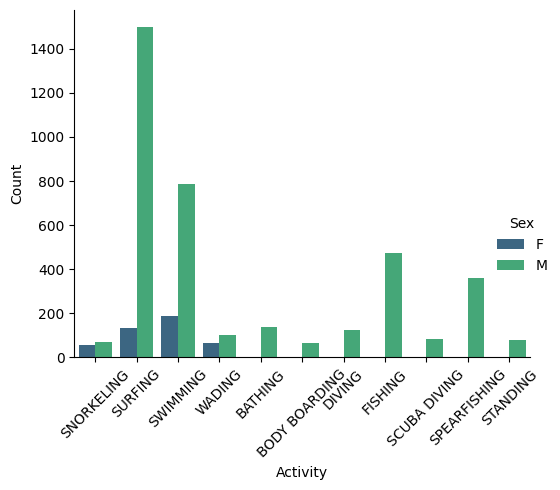

In [49]:
attack_count = df_sharks_attack.groupby(["Sex", "Activity"]).size().reset_index(name= "Count")

filtered_df = attack_count[attack_count["Count"] >= 50]

plt.figure(figsize=(10,6))
sns.catplot(x= "Activity", y="Count", hue= "Sex", kind= "bar", data= filtered_df, palette="viridis")
plt.xticks(rotation = 45)
plt.tight_layout();


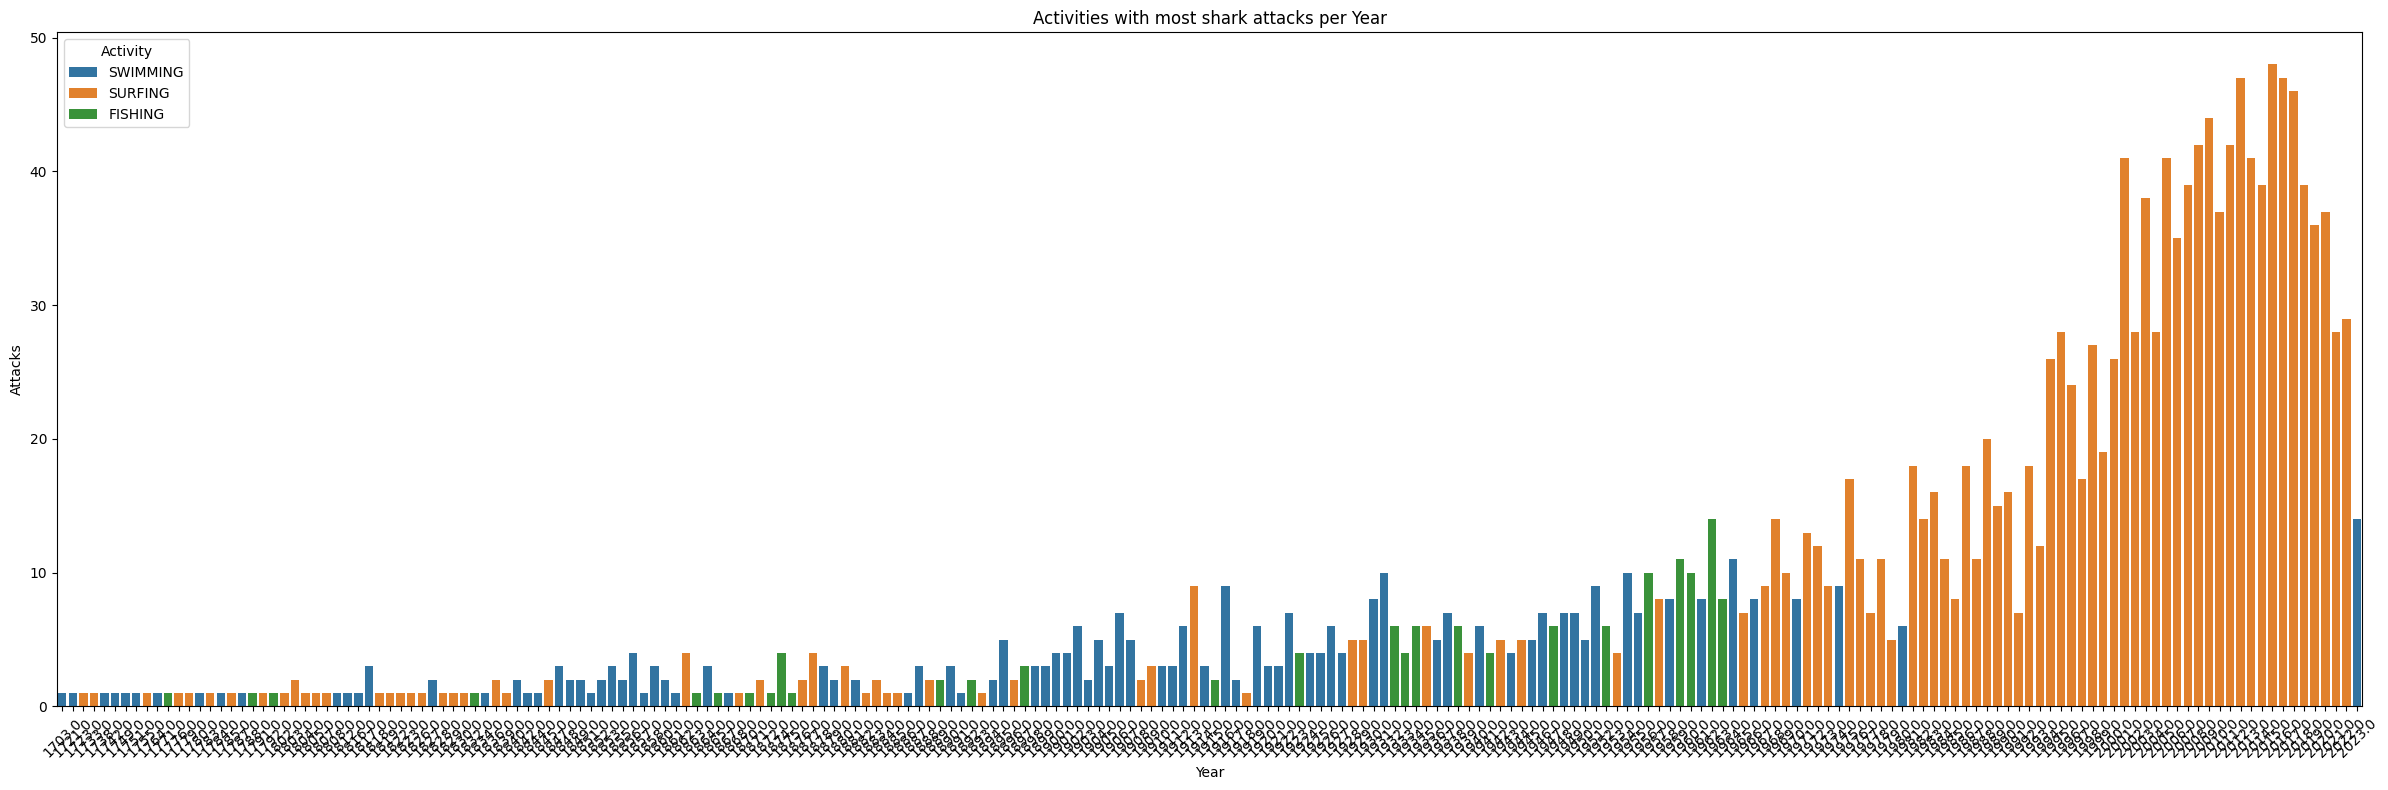

In [50]:
#Pero... ¿Y la actividad respecto al año?


activity_counts = df_sharks_attack.groupby(["Year", "Activity"]).size().reset_index(name="Count")

activity_counts_filtered = activity_counts.groupby('Activity').filter(lambda x: x['Count'].sum() >= 450)


idmax_per_year = activity_counts.loc[activity_counts.groupby("Year")["Count"].idxmax()]

top_activities_per_year = (
    activity_counts_filtered
    .sort_values('Count', ascending=False)
    .groupby('Year')
    .first()
    .reset_index()
)

#Vamos a verlo más claramente...

plt.figure(figsize=(24,8))
sns.barplot(x="Year", y= "Count", hue= "Activity", data= top_activities_per_year, dodge= False)

plt.xlabel("Year")
plt.ylabel("Attacks")
plt.title("Activities with most shark attacks per Year")
plt.legend(title = "Activity")

plt.xticks(rotation = 45)

plt.tight_layout()

plt.show()


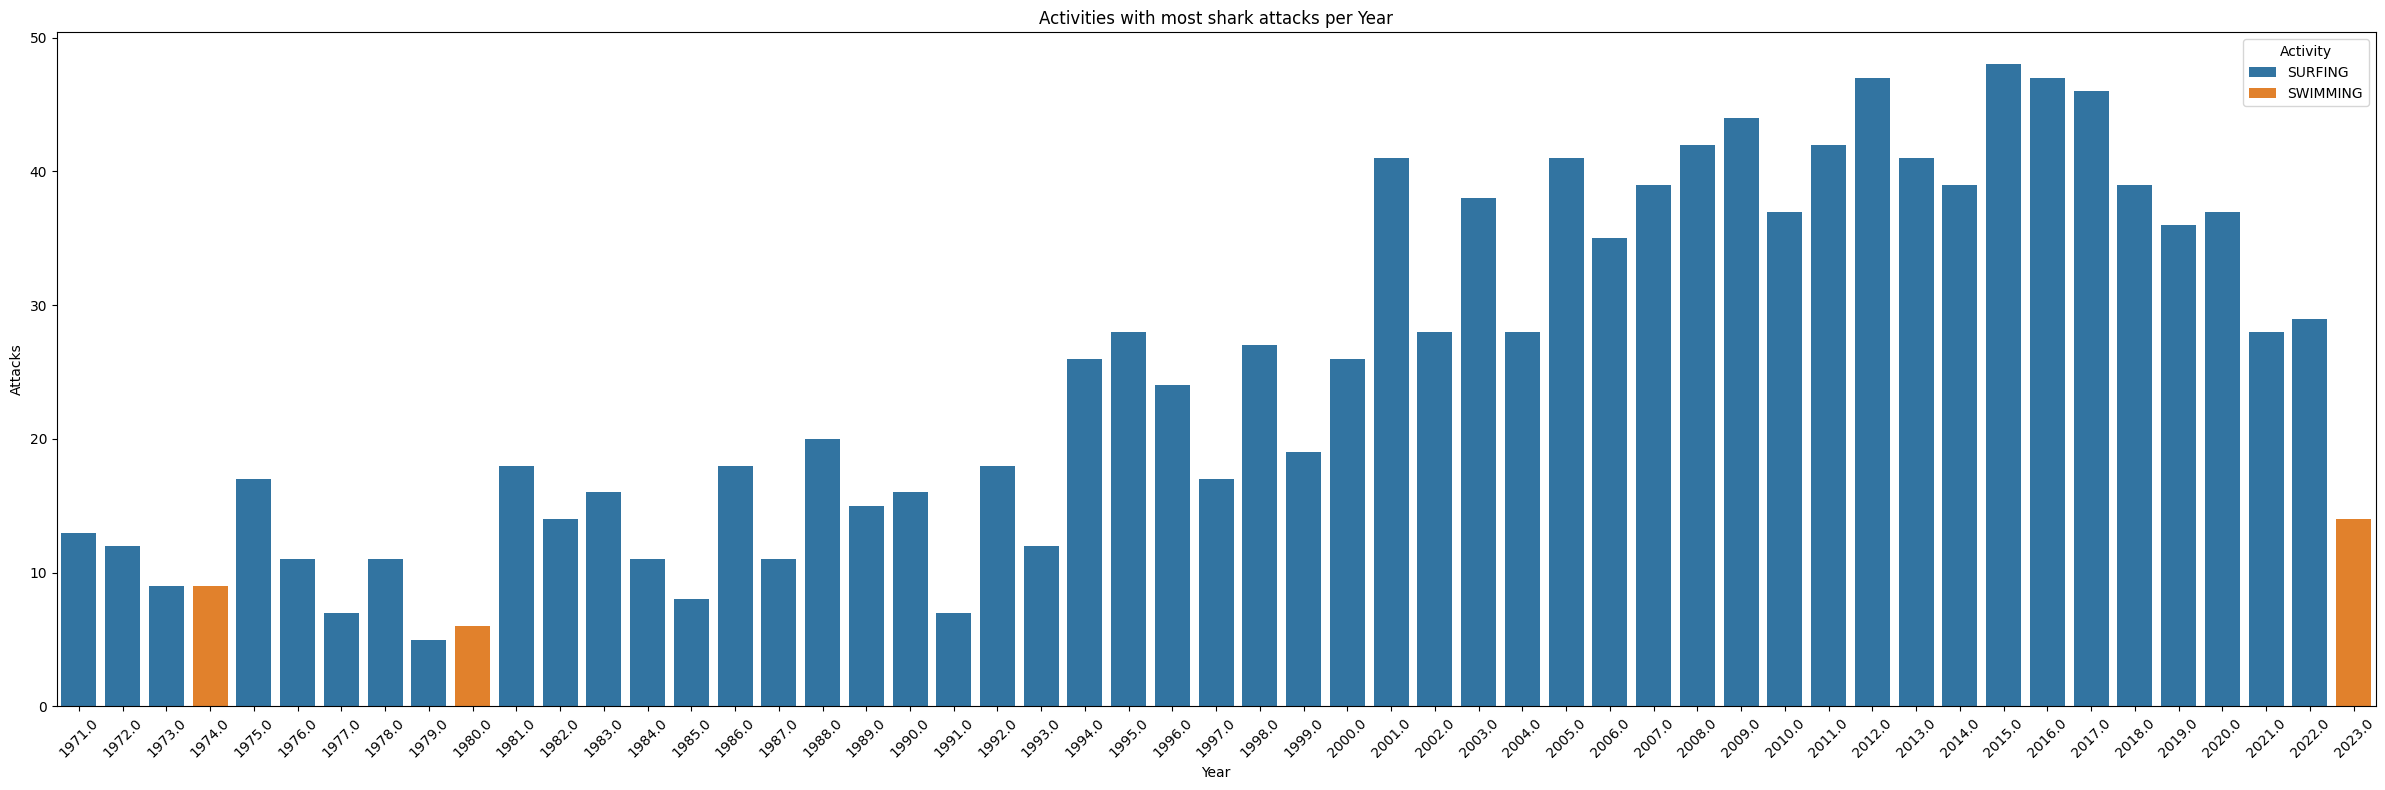

In [51]:
#Podemos ver que en muchos años apenas hay ataques... Así que vamos a omitirlos en la grafica

df_sharks_attack = df_sharks_attack[df_sharks_attack["Year"] > 1970.0]

activity_counts = df_sharks_attack.groupby(["Year", "Activity"]).size().reset_index(name="Count")

activity_counts_filtered = activity_counts.groupby('Activity').filter(lambda x: x['Count'].sum() >= 25)


idmax_per_year = activity_counts.loc[activity_counts.groupby("Year")["Count"].idxmax()]

top_activities_per_year = (
    activity_counts_filtered
    .sort_values('Count', ascending=False)
    .groupby('Year')
    .first()
    .reset_index()
)

#Vamos a verlo más claramente...

plt.figure(figsize=(24,8))
sns.barplot(x="Year", y= "Count", hue= "Activity", data= top_activities_per_year, dodge= False)

plt.xlabel("Year")
plt.ylabel("Attacks")
plt.title("Activities with most shark attacks per Year")
plt.legend(title = "Activity")

plt.xticks(rotation = 45)

plt.tight_layout()

plt.show()

In [52]:
attack_count

,Sex,Activity,Count
0,F,"16' CATAMARAN CAPSIZED PREVIOUS NIGHT, OCCUPAN...",1
1,F,17 MALDIVIANS ADRIFT IN OPEN BOAT FOR 31 DAYS,1
2,F,A CORSAIR'S BOAT WAS OVERTURNED,1
3,F,AIR DISASTER,1
4,F,ATTEMPTING TO ATTRACT DOLPHINS,1
...,...,...,...
1493,Unknown,.,1
1494,Unknown,FISHING,1
1495,Unknown,STANDING ON LANDED SHARK'S TAIL,1
1496,Unknown,SURFING,1


In [53]:
#Ahora veamos las edades de los ataques. Sabemos que la media es 28 años, ya que hemos rellenado los NaN con ella. Repasemos...
media_edad = round(df_sharks_attack["Age_clean"].mean(), ndigits= 0)

print(f"La media de edad de los ataques es: {media_edad}")

La media de edad de los ataques es: 29.0


In [54]:
#Con esto en mente... Veamos las frecuencias... 

age_attack = df_sharks_attack["Age_clean"].value_counts()

print(age_attack)

#Con esto podemos ver que 28, es la edad más atacada. Aunque sabemos que tal vez no sea así por la limpieza de datos. Así que centremonos en el resto.
age_attack_excl = age_attack[age_attack.index != 28.0]
print(age_attack_excl)

#Veamos un poco las franjas de edad... Por ejemplo de los 17 a los 25 años

age_filter = (df_sharks_attack["Age_clean"] >= 17.0) & (df_sharks_attack["Age_clean"]<= 27.0)
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("De los 17 a los 27: ",age_count)


#Y ahora lo contrario...

age_filter = (df_sharks_attack["Age_clean"] >= 30.0) & (df_sharks_attack["Age_clean"]<= 99.0)
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("De los 65 a los 99: ", age_count)

#Veamos cuantos menores:

age_filter = (df_sharks_attack["Age_clean"] <= 17.0)
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("Niños atacados:", age_count)

#Aquí podemos ver la dispersion... 

Age_clean
28.0    1167
17.0     113
20.0     112
16.0      99
15.0      97
        ... 
82.0       1
84.0       1
86.0       1
87.0       1
72.0       1
Name: count, Length: 79, dtype: int64
Age_clean
17.0    113
20.0    112
16.0     99
15.0     97
19.0     97
       ... 
82.0      1
84.0      1
86.0      1
87.0      1
72.0      1
Name: count, Length: 78, dtype: int64
De los 17 a los 27:  918
De los 65 a los 99:  1173
Niños atacados: 700


De los 17 a los 27:  918


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\1512892671.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")


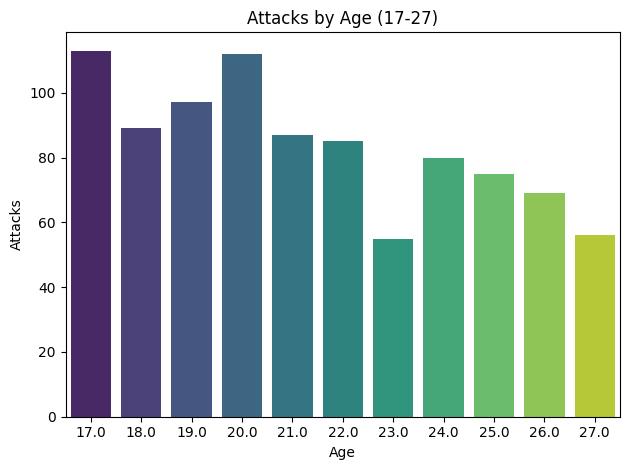

In [55]:
#Representemoslo en una gráfica

#Veamos un poco las franjas de edad... Por ejemplo de los 17 a los 25 años

age_filter = (df_sharks_attack["Age_clean"] >= 17.0) & (df_sharks_attack["Age_clean"]<= 27.0)
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("De los 17 a los 27: ",age_count)

fig, axs = plt.subplots(1,1)

sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")

axs.set_title("Attacks by Age (17-27)")
axs.set_xlabel("Age")
axs.set_ylabel("Attacks")

plt.savefig("./img/attacks_17_27_age.png", dpi = 300)
plt.tight_layout();

De los 30 a los 80:  1169


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\3647482244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")


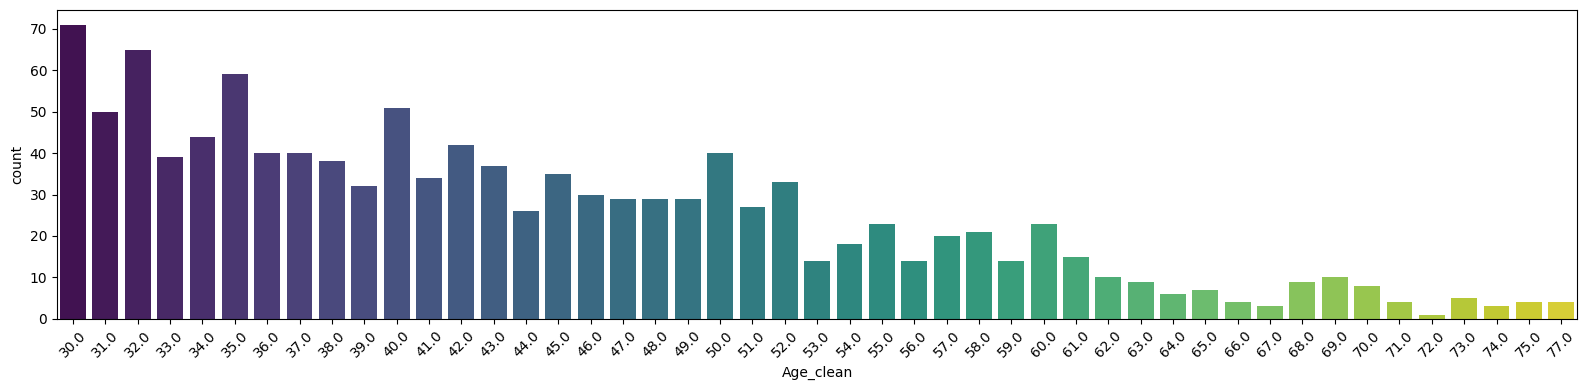

In [56]:
#Y ahora lo contrario...

age_filter = (df_sharks_attack["Age_clean"] >= 30.0) & (df_sharks_attack["Age_clean"]<= 80.0)
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("De los 30 a los 80: ", age_count)

fig, axs = plt.subplots(1,1, figsize= (16,4))

sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")

plt.xticks(rotation= 45)

plt.tight_layout();

Todos los ataques excepto los de 28 años:  2744


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\3448126371.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")


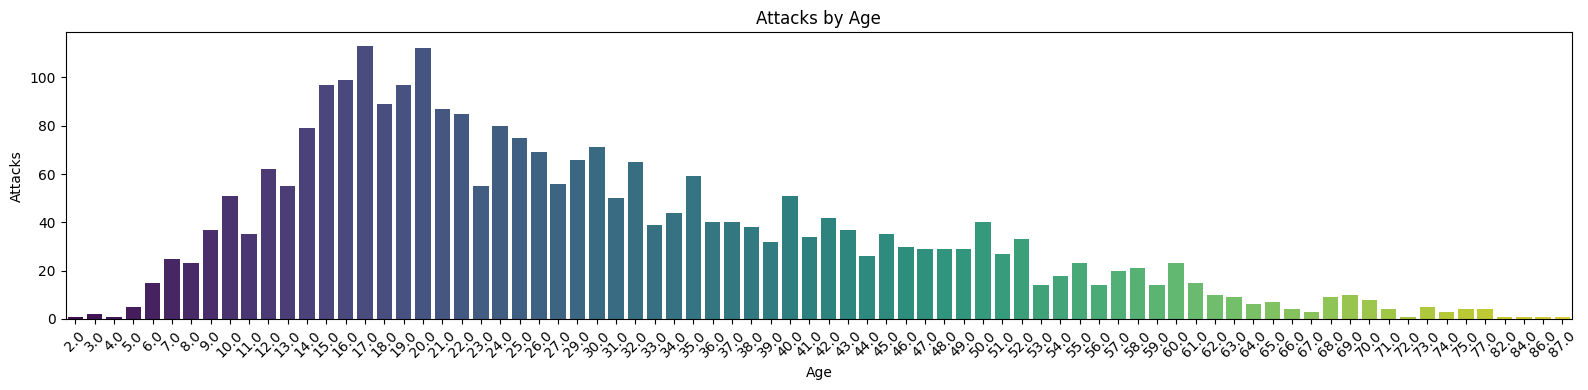

In [57]:
#Veamos un poco las franjas de edad... Por ejemplo de los 17 a los 25 años

age_filter = df_sharks_attack["Age_clean"] != 28.0
df_age_filtered = df_sharks_attack[age_filter]

age_count = df_age_filtered.shape[0]

print("Todos los ataques excepto los de 28 años: ",age_count)

fig, axs = plt.subplots(1,1, figsize= (16,4))

sns.countplot(x="Age_clean", data= df_age_filtered, palette="viridis")

axs.set_title("Attacks by Age")
axs.set_xlabel("Age")
axs.set_ylabel("Attacks")

plt.savefig("./img/attacks_age.png", dpi = 300)
plt.xticks(rotation= 45)

plt.tight_layout();

In [58]:
# Ahora que sabemos las edades y las actividades y generos... Vamos con los paises.

country_attacks = df_sharks_attack["Country"].value_counts()

print(country_attacks, "\n")

country_attacks_rl = df_sharks_attack["Country"].value_counts() / len(df_sharks_attack) * 100

country_attacks_rl

Country
USA              1867
AUSTRALIA         692
SOUTH AFRICA      379
BRAZIL            111
BAHAMAS           104
                 ... 
BRITISH ISLES       1
CAPE VERDE          1
NEVIS               1
COMOROS             1
TURKEY              1
Name: count, Length: 122, dtype: int64 



Country
USA              47.737152
AUSTRALIA        17.693684
SOUTH AFRICA      9.690616
BRAZIL            2.838149
BAHAMAS           2.659166
                   ...    
BRITISH ISLES     0.025569
CAPE VERDE        0.025569
NEVIS             0.025569
COMOROS           0.025569
TURKEY            0.025569
Name: count, Length: 122, dtype: float64

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2325000936.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df_sumario, x= "Country", y= "Attacks", palette="viridis")


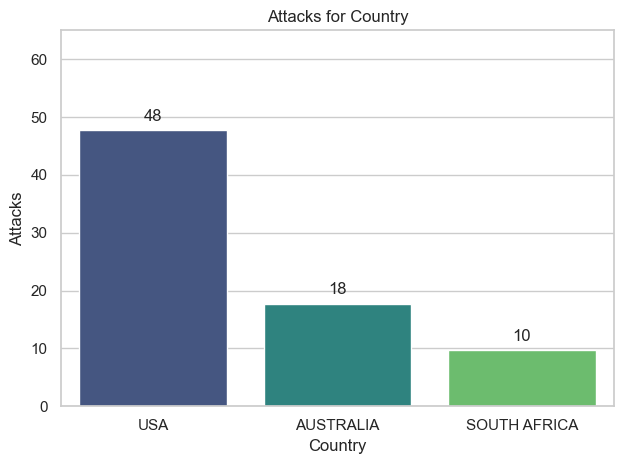

In [74]:
#Volvemos a usar un umbral para almacenar los datos más pequeños

umbral = 8

small_segments = country_attacks_rl[country_attacks_rl < umbral]

country_attacks_rl.loc["Others"] = small_segments.sum()

country_attacks_rl = country_attacks_rl.drop(small_segments.index)

#Vamos a convertirlo en un DataFrame para poder manejarlo mejor con Seaborn

df_sumario = country_attacks_rl.reset_index()
df_sumario.columns = ["Country", "Attacks"]

#Quitamos Others para que no estorbe.
#df_sumario = df_sumario[df_sumario["Country"] != "Others"]

ax = sns.barplot(df_sumario, x= "Country", y= "Attacks", palette="viridis")

ax.set_ylim(0, 65)
plt.title("Attacks for Country")
plt.xlabel("Country")
plt.ylabel("Attacks")


for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center",
                xytext= (0,10),
                textcoords= "offset points")

plt.tight_layout()
plt.savefig("./img/country_attacks.png", dpi = 300)

plt.show();

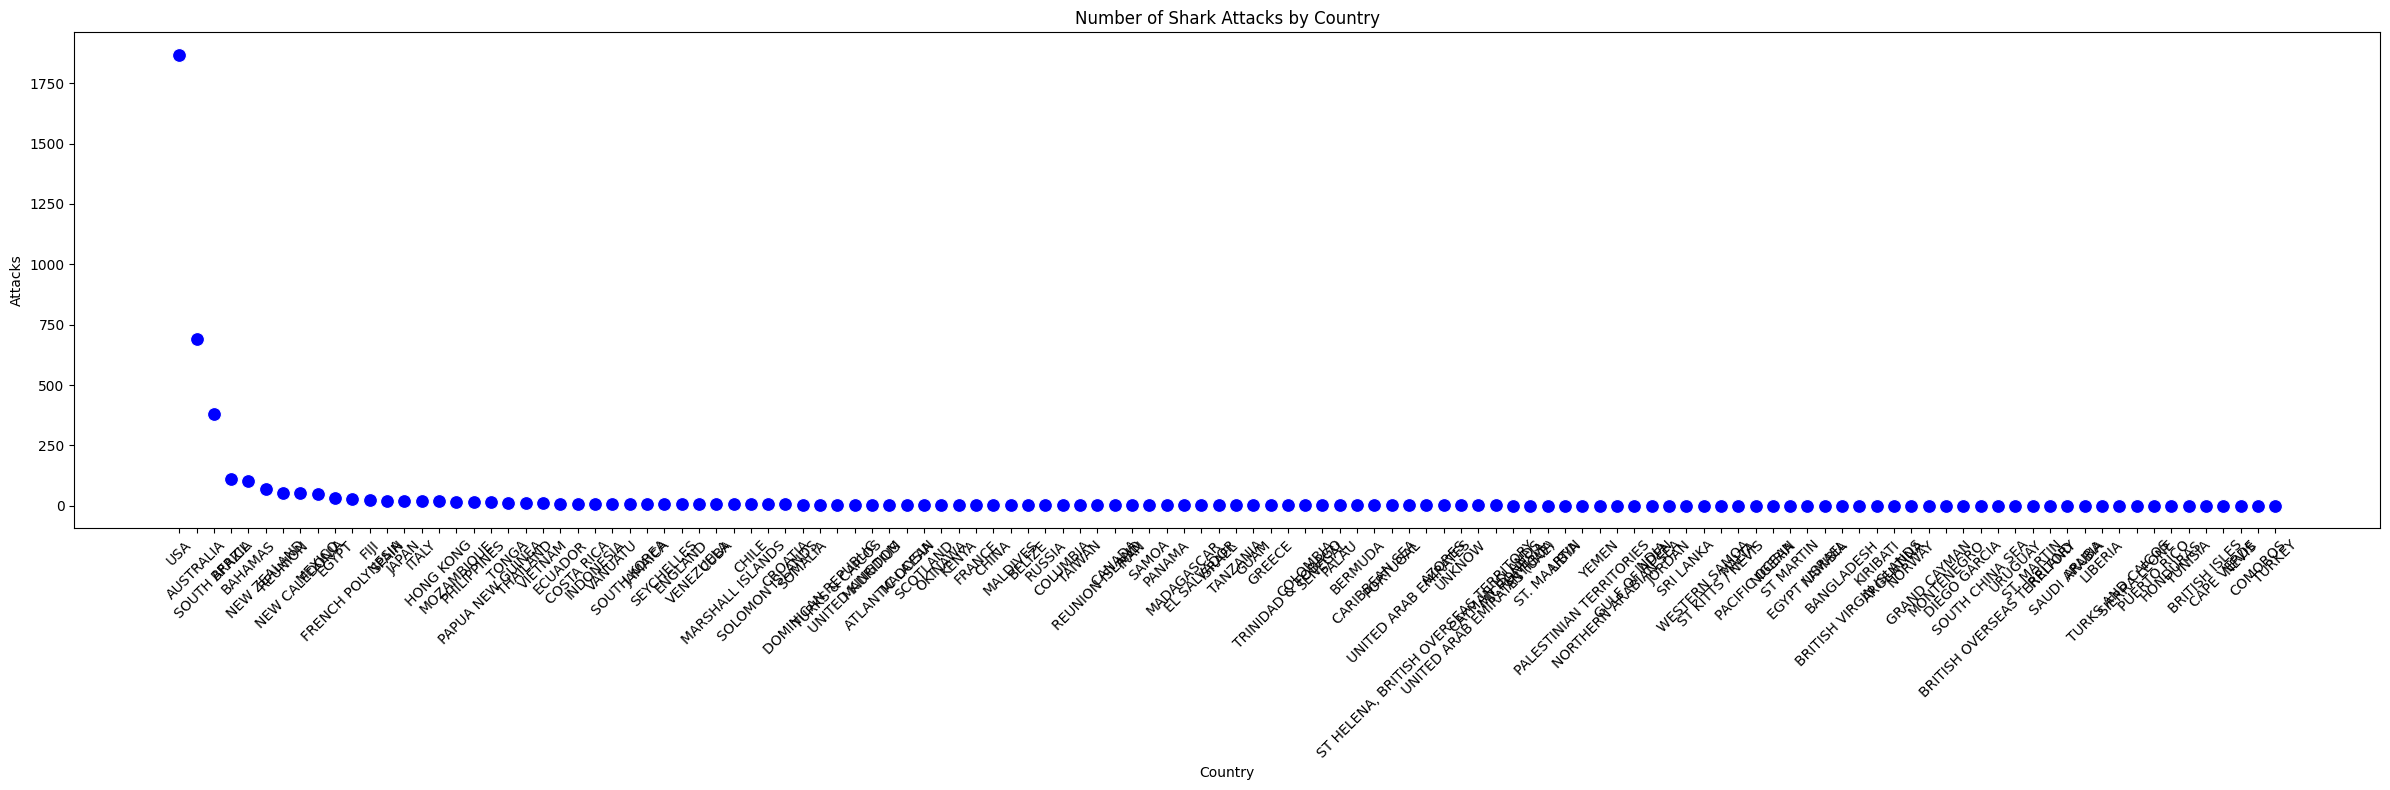

In [60]:
#Veamos la dispersion...

attacks_by_country = df_sharks_attack["Country"].value_counts().reset_index()

attacks_by_country.columns = ["Country", "AttackCount"]

#Veamos la grafica.

plt.figure(figsize=(24,8))
sns.scatterplot(x="Country", y="AttackCount", data=attacks_by_country, s= 100, color= "blue")

plt.xlabel("Country")
plt.ylabel("Attacks")
plt.title("Number of Shark Attacks by Country")
plt.xticks(rotation = 45)

plt.tight_layout()

plt.show();

In [61]:
# Ahora vamos con el tema que más me espina. La mortalidad de los ataques de tiburon. Veamos un analisis general a lo largo del tiempo. 


mortalidad = df_sharks_attack["Fatal (Y/N)"].value_counts()

print(mortalidad)

#Parece que la mortalidad es muy baja.

mortalidad_rl = df_sharks_attack["Fatal (Y/N)"].value_counts() / len(df_sharks_attack) * 100

mortalidad_rl
#Más del 70 por ciento de ataques no llegan a ser mortales.

Fatal (Y/N)
N          3182
Y           427
UNKNOWN     302
Name: count, dtype: int64


Fatal (Y/N)
N          81.360266
Y          10.917924
UNKNOWN     7.721810
Name: count, dtype: float64

In [62]:
#Ahora veamos los ataques por años:

mortality_per_year = df_sharks_attack["Fatal (Y/N)"].groupby(df_sharks_attack["Year"]).value_counts()
mortality_per_year

Year    Fatal (Y/N)
1971.0  N              21
        Y               7
        UNKNOWN         1
1972.0  N              26
        Y               8
                       ..
2022.0  Y              11
        UNKNOWN         1
2023.0  N              53
        Y               6
        UNKNOWN         4
Name: count, Length: 158, dtype: int64

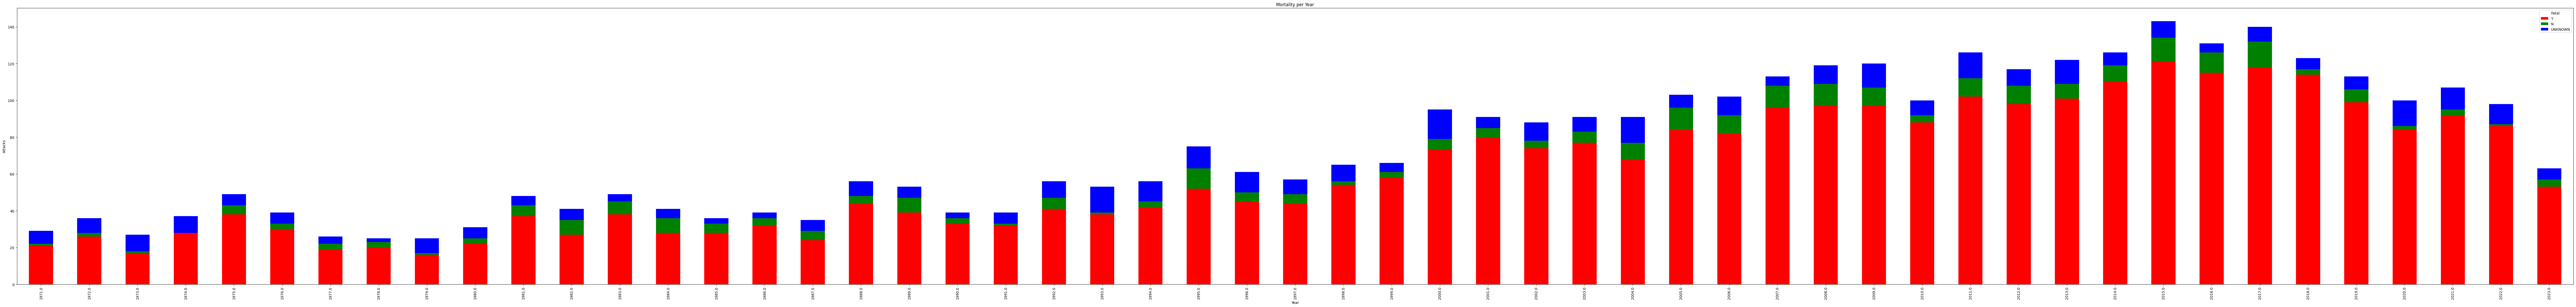

In [63]:
#Vamos a verlo en una gráfica.

mortality_per_year = df_sharks_attack.groupby(["Year", "Fatal (Y/N)"]).size().unstack(fill_value= 0)

mortality_per_year.plot(kind="bar", stacked=True, figsize=(100,12), color=["red", "green", "blue"])

plt.xlabel("Year")
plt.ylabel("Attacks")
plt.title("Mortality per Year")
plt.legend(title = "Fatal", labels= ["Y", "N", "UNKNOWN"])

plt.tight_layout()

plt.show()

#Queda patente que la mortalidad siempre ha sido baja, a pesar del bombo que se le da.

C:\Users\shark\AppData\Local\Temp\ipykernel_3860\4219313856.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= "Mortality", y="Relative Frecuencies (%)", data= mortality_df, palette="viridis")


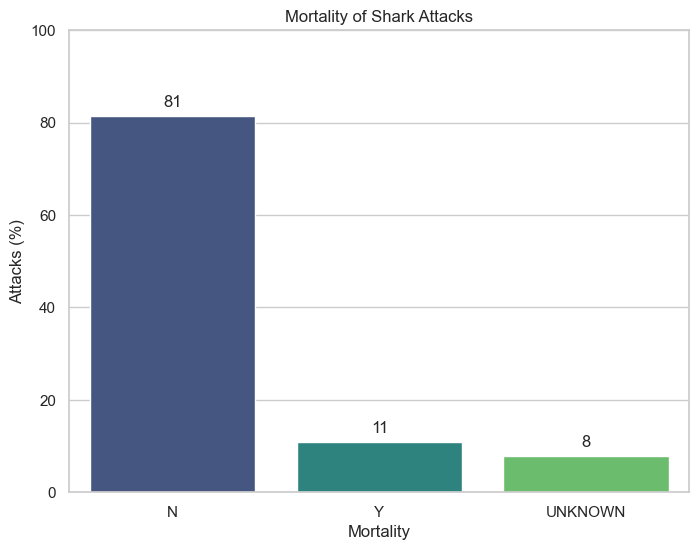

In [78]:
#Mortalidad relativa

mortality_counts = df_sharks_attack["Fatal (Y/N)"].value_counts()

mortality_frequencies = mortality_counts / mortality_counts.sum() *100

mortality_df = pd.DataFrame({
    "Mortality": mortality_frequencies.index,
    "Relative Frecuencies (%)": mortality_frequencies.values
})


plt.figure(figsize= (8,6))
ax = sns.barplot(x= "Mortality", y="Relative Frecuencies (%)", data= mortality_df, palette="viridis")


for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center",
                xytext= (0,10),
                textcoords= "offset points")

plt.ylim(0,100)
plt.xlabel("Mortality")
plt.ylabel("Attacks (%)")
plt.title("Mortality of Shark Attacks")

plt.savefig("./img/mortality_of_shark_attacks.png", dpi = 300);



In [65]:
#Y ahora que sabemos que 2015 fue el año con más ataques... ¿Cuantos de ellos fueron mortales?

fatal_counts = df_2015["Fatal (Y/N)"].value_counts()

fatal_attacks = fatal_counts.get("Y", 0)
non_fatal_attacks = fatal_counts.get("N", 0)
total_attacks = fatal_attacks + non_fatal_attacks


#Calculemos la mortalidad...

mortality_rate = fatal_attacks / total_attacks if total_attacks > 0 else 0
mortality_percentage = mortality_rate * 100

print(f"Total attacks in 2015: {total_attacks} \n")
print(f"Total fatal attacks in 2015: {fatal_attacks}\n")
print(f"Percentage of mortality in 2015: {mortality_percentage}")

#Esto nos deja ver que las muertes por ataques de tiburon tienen una tasa de mortalidad extremadamente baja. Hay que compararla con las de coche por ejemplo. 

Total attacks in 2015: 130 

Total fatal attacks in 2015: 9

Percentage of mortality in 2015: 6.923076923076923


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\2255022602.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x= "Type", y= "Count", data= df_mortality, palette="viridis")


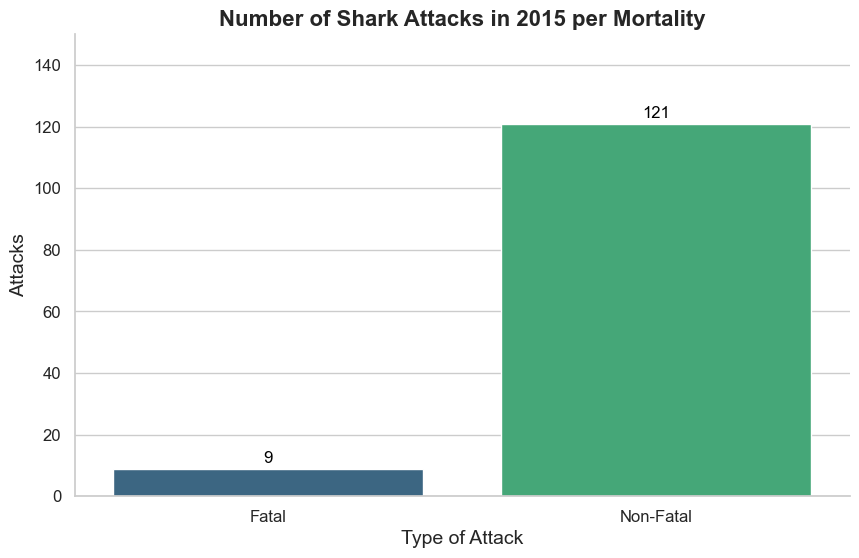

In [66]:
#Veamos este dato en una gráfica limpia para la presentación


data = {
    "Type": ["Fatal", "Non-Fatal"],
    "Count": [fatal_attacks, non_fatal_attacks]
}

df_mortality = pd.DataFrame(data)


#Creemos el gráfico
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

#Creamos el gráfico de barras...

ax= sns.barplot(x= "Type", y= "Count", data= df_mortality, palette="viridis")

for index, row in df_mortality.iterrows():
    ax.text(index, row["Count"] +1, f"{row['Count']}", ha= 'center', va= 'bottom', fontsize= 12, color= 'black')
    
    
#Configuramos el estilo y...

plt.title("Number of Shark Attacks in 2015 per Mortality", fontsize= 16, fontweight = "bold")
plt.xlabel("Type of Attack", fontsize= 14)
plt.ylabel("Attacks", fontsize= 14)
plt.ylim(0,150)

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

#Añadimos el recuadro para mejor claridad
sns.despine()

plt.savefig("./img/mortality_in_2015.png", dpi = 300)

plt.show();



In [67]:
#Y ahora el ultimo... Un analisis de especies. Veamos que tiburones son los que más atacan.


most_shark = df_sharks_attack["Species"].value_counts()

print(most_shark)

Species
UNKNOW                                              1422
WHITE SHARK                                          524
TIGER SHARK                                          245
BULL SHARK                                           180
SHARK INVOLVEMENT NOT CONFIRMED                       74
                                                    ... 
THOUGHT TO INVOLVE A BRONZE WHALE SHARK, 2M            1
6' SHARK, POSSIBLY A BLACTIP OR SPINNER SHARK          1
SPINNER SHARK, 5'                                      1
SICKELFIN LEMON SHARK, 3M                              1
1.2 M TO 1.8 M [4' TO 6'] SHARK OBSERVED IN AREA       1
Name: count, Length: 634, dtype: int64


In [68]:
#Se puede apreciar que en la mayoria de los casos, nadie sabe la especie del tiburon, ya que no hay confirmación visual. 
#Sin embargo podemos ver que hay tres especies que si se han visto y ostentan el mayor numero de ataques de tiburon.
#Pero cuantos de ellos han sido fatales?... Cojamos las tres especies y hagamos un recuento.

species_of_interes = ["WHITE SHARK", "TIGER SHARK", "BULL SHARK"]
filtered_df= df_sharks_attack[df_sharks_attack["Species"].isin(species_of_interes)]

fatality_count = filtered_df.groupby(["Species", "Fatal (Y/N)"]).size().unstack(fill_value=0)
fatality_count.columns = ["Non_Fatal", "Fatal", "Unknown"]

print(fatality_count)

             Non_Fatal  Fatal  Unknown
Species                               
BULL SHARK         149      3       28
TIGER SHARK        187      4       54
WHITE SHARK        417      8       99


In [69]:
#Vemos que el White Shark sale ganando... Pero es realmente el que más muertes causa? Sus ataques son muchos pero... Casi ninguno es fatal.

fatality_count["Total"] = fatality_count["Fatal"] + fatality_count["Non_Fatal"]
fatality_count["Fatality Rate (%)"] = (fatality_count["Fatal"] / fatality_count["Total"]) * 100

print(fatality_count[["Fatality Rate (%)"]])


             Fatality Rate (%)
Species                       
BULL SHARK            1.973684
TIGER SHARK           2.094241
WHITE SHARK           1.882353


C:\Users\shark\AppData\Local\Temp\ipykernel_3860\3254431114.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Species", y= "Fatality Rate (%)", data= fatality_count, palette="viridis", ax= ax1)


KeyError: 'Species'

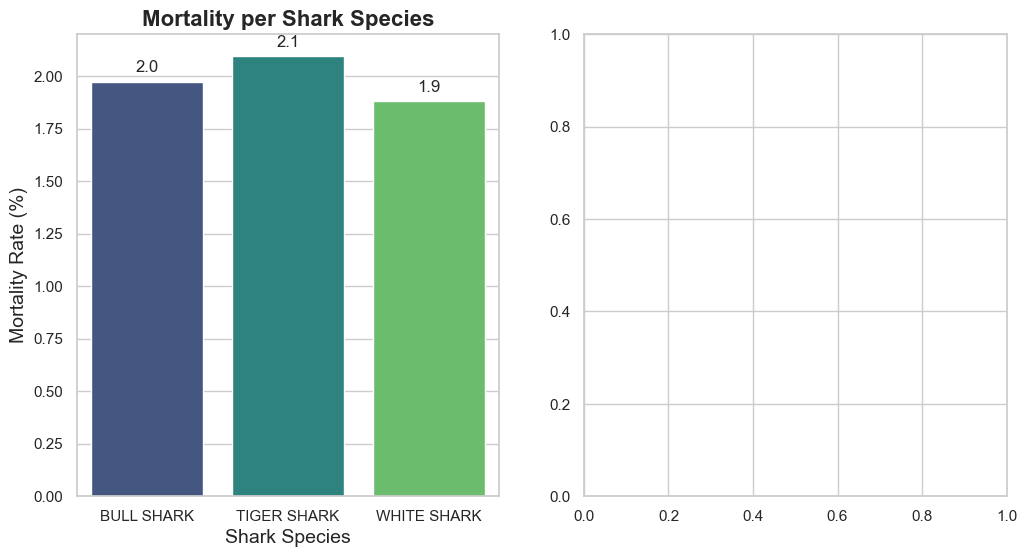

In [79]:

#Y a pesar de ello, el White Shark es menos fatal que el Tiger o el Bull. 


#Veamos todo representado en una gráfica. 


#fatality_count_melted = fatality_count.melt(id_vars=["Species"], value_vars= ["Fatality Rate (%)"], 
                                            #var_name= "Metric", value_name="Value")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

sns.barplot(x= "Species", y= "Fatality Rate (%)", data= fatality_count, palette="viridis", ax= ax1)

# Agregar valores a las barras
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ".1f"),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="center", xytext=(0, 10),
                    textcoords="offset points")

ax1.set_title("Mortality per Shark Species", fontsize= 16, fontweight= "bold")
ax1.set_xlabel("Shark Species", fontsize= 14)
ax1.set_ylabel("Mortality Rate (%)", fontsize= 14)
ax1.set_xticklabels(fatality_count["Species"], rotation = 45)
ax1.set_ylim(0,3)

#Ahora los ataques por especie

fatality_count.set_index('Species')[['Fatal', 'Non_Fatal']].plot(kind='bar', stacked=True, ax=ax2, color=['red', 'lightgrey'])

# Configurar el gráfico
ax2.set_title('Attacks per Shark Species', fontsize=16, fontweight='bold')
ax2.set_xlabel('Shark Species', fontsize=14)
ax2.set_ylabel('Attacks', fontsize=14)
ax2.legend(title='Type Attack', title_fontsize='13', fontsize='12')
ax2.set_xticklabels(fatality_count['Species'], rotation=45)

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax2.annotate(f'{height:.0f}', (x, y), ha='center', va='center', color='black', fontsize=10)
    

plt.savefig("./img/attacks_per_species.png", dpi = 300)

plt.show()


In [ ]:
# Y la tasa de mortalidad por actividad... 


#Veamos de las 3 actividades con más ataques y su ratio de mortalidad. 

activities_of_interest = ["SURFING", "SWIMMING", "FISHING"]
filtered_df = df_sharks_attack[df_sharks_attack["Activity"].isin(activities_of_interest)]

activity_counts= filtered_df.groupby("Activity").agg({
    "Fatal (Y/N)": lambda x: (x == "Y").sum(),
    "Activity": "count"
}).rename(columns={"Fatal (Y/N)": "Fatal_Count", "Activity": "Total_Count"})


activity_counts["Fatality_Rate"] = (activity_counts["Fatal_Count"] / activity_counts["Total_Count"])


top_activities = activity_counts.sort_values(by= "Fatality_Rate", ascending= False)

print(top_activities)

          Fatal_Count  Total_Count  Fatality_Rate
Activity                                         
SWIMMING           92          528       0.174242
SURFING            84         1312       0.064024
FISHING            11          225       0.048889


C:\Users\shark\AppData\Local\Temp\ipykernel_11696\619335392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_activities.index, y= "Fatality_Rate", data= top_activities, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

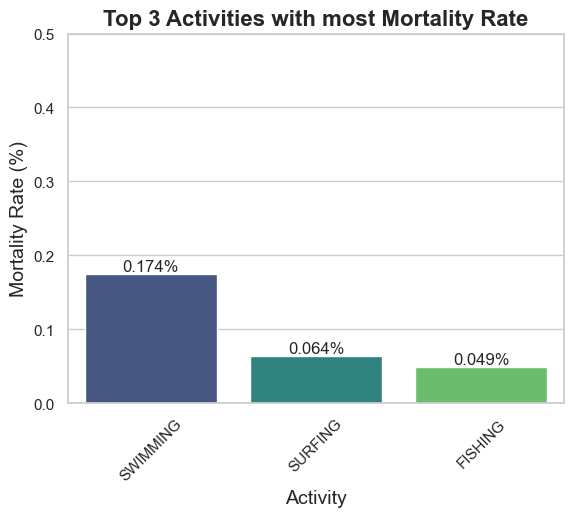

In [ ]:
sns.barplot(x= top_activities.index, y= "Fatality_Rate", data= top_activities, palette="viridis")

for index, value in enumerate(top_activities['Fatality_Rate']):
    plt.text(index, value + 0, f"{value:.3f}%", ha='center', va='bottom')
    
plt.title("Top 3 Activities with most Mortality Rate", fontsize= 16, fontweight = "bold")
plt.xlabel("Activity", fontsize= 14)
plt.ylabel("Mortality Rate (%)", fontsize= 14)
plt.xticks(rotation = 45)
plt.ylim(0,0.5)

plt.savefig("./img/top_3_activities.png", dpi = 300)
plt.show